<a href="https://colab.research.google.com/github/emartineznunez/Thermodynamics/blob/main/lab2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use this python notebook to analyze, understand, and interpret the results of your work in lab 2b.<br>


In [ ]:
# @title ##### Installing libraries, fetching files and defining functions... (it may take a few seconds)
%%capture
!curl -LJO https://github.com/emartineznunez/Thermodynamics/raw/main/Lab2/cooling_curves.csv
!curl -LJO https://github.com/emartineznunez/Thermodynamics/raw/main/Lab2/SL_phase_diagram.dat
!sudo apt-get update
! apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.ticker as tck
from scipy.optimize import curve_fit
from scipy import stats
import warnings

pyplot.rcParams['text.usetex'] = True
warnings.filterwarnings("ignore")

def quadratic(x,a,b,c):
    return a + b * x + c * x * x


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1222  100  1222    0     0   3240      0 --:--:-- --:--:-- --:--:--  3240
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   186  100   186    0     0    514      0 --:--:-- --:--:-- --:--:--   514
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.u

1. Reading the file _cooling_curves.csv_<br>
**Make sure your data are separated by commas in the csv file. Otherwise, change the delimiter when reading _cooling_curves.csv_**
2. We now plot all cooling curves. From the curves, the solidification temperature of each sample must be obtained.

Number of samples =  2


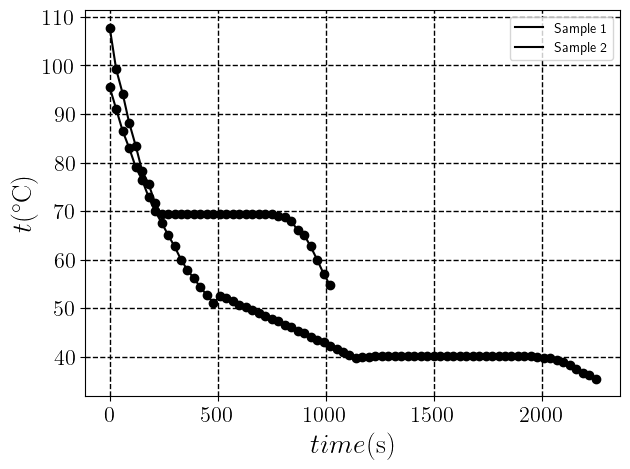

In [ ]:
# @title ##### Reading and plotting _cooling_curves.csv_

temp = pd.read_csv("cooling_curves.csv",sep=',')
#print(temp)
n_samples = int (len(temp.columns) / 2)
print("Number of samples = ",n_samples)
#mtime=int(input('Maximum time of the measurement (min) = '))

for j in range(n_samples):
#    pyplot.xticks(np.arange(0, mtime, step=2))
#    pyplot.xlim(0,mtime)
    i = j + 1
    time=temp['Sample'+str(i)+'_time'].values
    temperature=temp['Sample'+str(i)+'_temp'].values
    pyplot.plot(time,temperature,'-',color='k',label='Sample '+str(i))
    pyplot.plot(time,temperature,'o',color='k')
    pyplot.legend()
    pyplot.ylabel("$t (^{\circ} \mathrm{C})$",fontsize=20)
    pyplot.xlabel("$time ( \mathrm{s})$",fontsize=20)
    pyplot.xticks(fontsize=16)
    pyplot.yticks(fontsize=16)
    #pyplot.axes().yaxis.set_minor_locator(tck.AutoMinorLocator())
    pyplot.grid(color='k', linestyle='--', linewidth=1, which='both')
pyplot.tight_layout()
pyplot.savefig('Cooling_curves.png')
pyplot.show()

3. **Edit the file *SL_phase_diagram.dat*.** Once the solidification temperatures have been obtained, they have to be included in the file _SL_phase_diagram.dat_, which is read in the next lines of code to plot the SL phase diagram. We also fit the points on the left and right to two quadratic polynomials.

        x  temp
0   0.000  79.8
1   0.145  71.2
2   0.204  67.3
3   0.252  63.5
4   0.335  59.4
5   0.371  54.3
6   0.403  48.9
7   0.485  43.3
8   0.510  39.3
9   0.581  39.1
10  0.630  42.3
11  0.676  47.6
12  0.736  55.0
13  0.808  59.0
14  0.874  62.5
15  1.000  69.3
How many points on the left-hand side of the diagram form a group of points to fit =10
How many points on the right-hand side of the diagram form a group of points to fit =7
Coordinates (x and temp) where the blue and red curves cross:
x =  0.5518416477497082 temp =  35.028278210497646 ºC


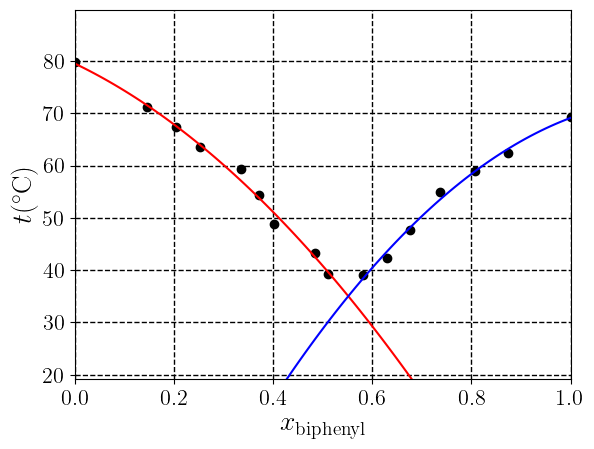

In [ ]:
# @title ##### Plotting the Phase diagram
!cp SL_phase_diagram.dat SL_phase_diagram.csv
stemp = pd.read_csv("SL_phase_diagram.csv",sep=',')
print(stemp)
x=stemp['x'].values
temp=stemp['temp'].values
l = int(input('How many points on the left-hand side of the diagram form a group of points to fit ='))
r = int(input('How many points on the right-hand side of the diagram form a group of points to fit ='))
r = len(x) - r
xf = x[:r]
yf = temp[:r]
xf2 = x[r:]
yf2 = temp[r:]
best_vals, covar = curve_fit(quadratic, xf, yf)
best_vals2, covar2 = curve_fit(quadratic, xf2, yf2)

xx = np.linspace(0, 1, num=100, endpoint=True)
fit = quadratic(xx,*best_vals)
fit2 = quadratic(xx,*best_vals2)
coeff=[best_vals[2] - best_vals2[2], best_vals[1] - best_vals2[1], best_vals[0] - best_vals2[0]]
print('Coordinates (x and temp) where the blue and red curves cross:')
for ele in np.roots(coeff):
    imag=ele.imag
    real=ele.real
    if real >= 0 and real <= 1 and imag==0:
        print('x = ',real,'temp = ',quadratic(ele,*best_vals).real,'ºC')

maxt=max(temp) + 10
mint=min(temp) - 20
pyplot.plot(x,temp,'o',color='k')
pyplot.plot(xx,fit,'-',color='r')
pyplot.plot(xx,fit2,'-',color='b')
#pyplot.axes().xaxis.set_minor_locator(tck.AutoMinorLocator())
pyplot.xlabel("$x_{\mathrm{biphenyl}}$",fontsize=20)
pyplot.ylabel("$t (^{\circ} \mathrm{C})$",fontsize=20)
pyplot.xlim(0,1)
pyplot.ylim(mint,maxt)
pyplot.xticks(fontsize=16)
pyplot.yticks(fontsize=16)
pyplot.grid(color='k', linestyle='--', linewidth=1, which='both')
pyplot.savefig('Phase_diagram.png')
pyplot.show()

4. Now the very first points from $x_{\mathrm{A}}=1$ and $x_{\mathrm{B}}=1$ are fit to:<br>
$lnx_{\mathrm{A}}=\frac{-\Delta H_{\mathrm{fus,A}}}{R}\left(\frac{1}{T}-\frac{1}{T_{\mathrm{A}}^*} \right)$<br>
and<br>
$lnx_{\mathrm{B}}=\frac{-\Delta H_{\mathrm{fus,B}}}{R}\left(\frac{1}{T}-\frac{1}{T_{\mathrm{B}}^*} \right)$<br>
In the limit of an ideal dilute solution (for $x_{i}\rightarrow 1$) prove that the first equation leads to:<br>
$\Delta T=T-T_{\mathrm{A}}^{*}=-\frac {R(T_{\mathrm{A}}^{*})^{2}M_{\mathrm{A}}}{\Delta H_{\mathrm{fus,A}}}m_{\mathrm{B}}$<br>
where $M_{\mathrm{A}}$ is the molecular mass of A in kg/mol, and $m_{\mathrm{B}}$ is the molality of B in mol/Kg<br>
Use different number of points in the fit and see how the results change.<br>
In the code below, the heats of fusion of naphthalene and biphenyl are determined using the above fits<br>
__Make a plot with the points and fits in each case and compare with the experimental values__

How many points do you want to use in the fits?: 3
DeltaH,fus (naphtalene) =  18.262613523082074 kJ/mol


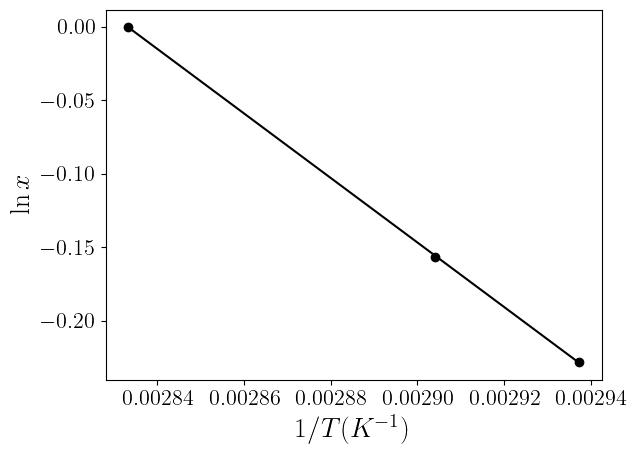

DeltaH,fus (biphenyl) =  19.49119341421096 kJ/mol


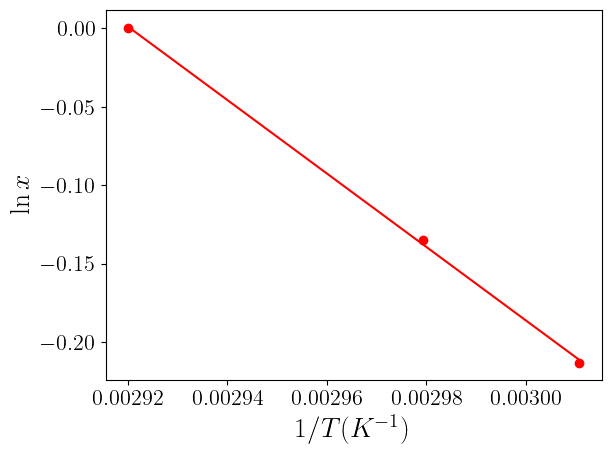

In [ ]:
# @title ##### Determination of $\Delta H_{\mathrm{fus,A}}$ and $\Delta H_{\mathrm{fus,B}}$
#Naphthalene
npf=int(input("How many points do you want to use in the fits?: "))

xx = 1 / ( temp[:npf] + 273.15 )
yy = np.log(1 - x[:npf])
R = 8.314472 / 1000 # kJ/mol/K

slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)
print('DeltaH,fus (naphtalene) = ', - slope * R,'kJ/mol')

fit = intercept + slope * xx
pyplot.plot(xx,yy,'o',color='k')
pyplot.plot(xx,fit,'-',color='k')

pyplot.xlabel("$ 1/T (K^{-1})$",fontsize=20)
pyplot.ylabel("$ \ln x$",fontsize=20)
pyplot.xticks(fontsize=16)
pyplot.yticks(fontsize=16)
pyplot.savefig('DeltaH_naph.png')
pyplot.show()

#Biphenyl
n = len(x) - npf
xx = 1 / ( temp[n:] + 273.15 )
yy = np.log(x[n:])
R = 8.314472 / 1000 # kJ/mol/K
slope2, intercept2, r_value, p_value, std_err = stats.linregress(xx,yy)
print('DeltaH,fus (biphenyl) = ', - slope2 * R,'kJ/mol')

fit = intercept2 + slope2 * xx
pyplot.plot(xx,yy,'o',color='r')
pyplot.plot(xx,fit,'-',color='r')
pyplot.xlabel("$ 1/T (K^{-1})$",fontsize=20)
pyplot.ylabel("$ \ln x$",fontsize=20)
pyplot.xticks(fontsize=16)
pyplot.yticks(fontsize=16)
pyplot.savefig('DeltaH_biph.png')

pyplot.show()

#### 5. Obtain the solidification temperature of the pure substances from the above fits

In [ ]:
print("Solidification temperature naphtalene=",quadratic(0,*best_vals))
print("Solidification temperature biphenyl=",quadratic(1,*best_vals2))


Solidification temperature naphtalene= 79.54345127304661
Solidification temperature biphenyl= 69.13154298691424


#### 6. Obtain the entropies of fusion of the pure substances from the above fits. Compare with the available experimental values (Google: Heat of fusion of XX)